<a href="https://colab.research.google.com/github/NinaMoisienko18/KSVD/blob/main/%D0%9C%D0%BE%D0%B8%CC%86%D1%81%D1%96%D1%94%D0%BD%D0%BA%D0%BE_%D0%9D%D1%96%D0%BD%D0%B0_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Встановлення PySpark

In [ ]:
!pip install pyspark==3.5.1

# 2. Імпорт необхідних бібліотек

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, count, min, max, sum, round, lit, to_date
from pyspark.sql.types import DoubleType, IntegerType

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import files


# 3.Створення SparkSession

In [ ]:
spark = SparkSession.builder.appName("CruiseDataAnalysis").getOrCreate()

In [ ]:
print("SparkSession created successfully.")

SparkSession created successfully.


# 4. Завантаження датасет

In [ ]:
uploaded = files.upload()

Saving cruise_dataset.csv to cruise_dataset.csv


In [ ]:
try:
    df = spark.read.csv('cruise_dataset.csv', header=True, inferSchema=True)
    print("Dataset 'cruise_dataset.csv' loaded successfully into PySpark DataFrame 'df'.")
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please ensure 'cruise_dataset.csv' is in the correct path or was uploaded correctly.")

Dataset 'cruise_dataset.csv' loaded successfully into PySpark DataFrame 'df'.


# 5. Перевірка даних

In [ ]:
df.printSchema()

root
 |-- Ship_name: string (nullable = true)
 |-- Cruise_line: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tonnage: double (nullable = true)
 |-- passengers: double (nullable = true)
 |-- length: double (nullable = true)
 |-- cabins: double (nullable = true)
 |-- passenger_density: double (nullable = true)
 |-- crew: double (nullable = true)



In [ ]:
df.show(5)

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
only showing top 5 rows



In [ ]:
df.count()

158

In [ ]:
len(df.columns)

9

In [ ]:
df.describe().show()

+-------+---------+-----------+------------------+------------------+-----------------+-----------------+------------------+-----------------+-----------------+
|summary|Ship_name|Cruise_line|               Age|           Tonnage|       passengers|           length|            cabins|passenger_density|             crew|
+-------+---------+-----------+------------------+------------------+-----------------+-----------------+------------------+-----------------+-----------------+
|  count|      158|        158|               158|               158|              158|              158|               158|              158|              158|
|   mean| Infinity|       NULL|15.689873417721518| 71.28467088607599|18.45740506329114|8.130632911392404| 8.830000000000005|39.90094936708861|7.794177215189873|
| stddev|     NULL|       NULL| 7.615691058751413|37.229540025907866|9.677094775143416|1.793473548054825|4.4714172221480615| 8.63921711391542|3.503486564627034|
|    min|Adventure|    Azamara|   

In [ ]:
print("\nChecking for null values (count of nulls per column):")
for column in df.columns:
    null_count = df.filter(col(column).isNull()).count()
    if null_count > 0:
        print(f"Column '{column}': {null_count} null values")


Checking for null values (count of nulls per column):


# 6. Вибір та перейменування стовпців

In [ ]:
df_selected = df.select(
    col("Ship_name").alias("ShipName"),
    col("Cruise_line").alias("CruiseLine"),
    col("Age").alias("ShipAge"),
    col("Tonnage").alias("GrossTonnage"),
    col("passengers").alias("Passengers"),
    col("crew").alias("Crew"),
    col("cabins").alias("Cabins"),
    col("passenger_density").alias("PassengerDensity")
)
print("\nDataFrame after selecting and renaming columns:")
df_selected.show(5)


DataFrame after selecting and renaming columns:
+-----------+----------+-------+------------------+----------+----+------+----------------+
|   ShipName|CruiseLine|ShipAge|      GrossTonnage|Passengers|Crew|Cabins|PassengerDensity|
+-----------+----------+-------+------------------+----------+----+------+----------------+
|    Journey|   Azamara|      6|30.276999999999997|      6.94|3.55|  3.55|           42.64|
|      Quest|   Azamara|      6|30.276999999999997|      6.94|3.55|  3.55|           42.64|
|Celebration|  Carnival|     26|            47.262|     14.86| 6.7|  7.43|            31.8|
|   Conquest|  Carnival|     11|             110.0|     29.74|19.1| 14.88|           36.99|
|    Destiny|  Carnival|     17|           101.353|     26.42|10.0| 13.21|           38.36|
+-----------+----------+-------+------------------+----------+----+------+----------------+
only showing top 5 rows



# 7. Фільтрація даних

In [ ]:
df_old_ships = df_selected.filter(col("ShipAge") > 20)
print("\nShips older than 20 years:")
df_old_ships.show(5)


Ships older than 20 years:
+-----------+----------+-------+------------+----------+----+------+----------------+
|   ShipName|CruiseLine|ShipAge|GrossTonnage|Passengers|Crew|Cabins|PassengerDensity|
+-----------+----------+-------+------------+----------+----+------+----------------+
|Celebration|  Carnival|     26|      47.262|     14.86| 6.7|  7.43|            31.8|
|    Ecstasy|  Carnival|     22|      70.367|     20.52| 9.2|  10.2|           34.29|
|    Fantasy|  Carnival|     23|      70.367|     20.56| 9.2| 10.22|           34.23|
|    Holiday|  Carnival|     28|      46.052|     14.52| 6.6|  7.26|           31.72|
|     Zenith| Celebrity|     21|      47.225|     13.66| 6.7|  6.87|           34.57|
+-----------+----------+-------+------------+----------+----+------+----------------+
only showing top 5 rows



# 8. Додавання нового стовпця (похідного)

In [ ]:
df_with_ratio = df_selected.withColumn(
    "Crew_per_Passenger",
    round(col("Crew") / col("Passengers"), 3) # округлюємо до 3 знаків після коми
)
print("\nDataFrame with 'Crew_per_Passenger' column:")
df_with_ratio.show(5)


DataFrame with 'Crew_per_Passenger' column:
+-----------+----------+-------+------------------+----------+----+------+----------------+------------------+
|   ShipName|CruiseLine|ShipAge|      GrossTonnage|Passengers|Crew|Cabins|PassengerDensity|Crew_per_Passenger|
+-----------+----------+-------+------------------+----------+----+------+----------------+------------------+
|    Journey|   Azamara|      6|30.276999999999997|      6.94|3.55|  3.55|           42.64|             0.512|
|      Quest|   Azamara|      6|30.276999999999997|      6.94|3.55|  3.55|           42.64|             0.512|
|Celebration|  Carnival|     26|            47.262|     14.86| 6.7|  7.43|            31.8|             0.451|
|   Conquest|  Carnival|     11|             110.0|     29.74|19.1| 14.88|           36.99|             0.642|
|    Destiny|  Carnival|     17|           101.353|     26.42|10.0| 13.21|           38.36|             0.379|
+-----------+----------+-------+------------------+----------+----+

# 9. Агрегація даних (groupBy)

In [ ]:
df_agg_by_line = df_selected.groupBy("CruiseLine").agg(
    count("ShipName").alias("NumberOfShips"),
    round(avg("GrossTonnage"), 2).alias("AvgTonnage"),
    round(avg("Passengers"), 2).alias("AvgPassengers"),
    round(avg("Crew"), 2).alias("AvgCrew"),
    round(avg("Cabins"), 2).alias("AvgCabins")
).orderBy(col("NumberOfShips").desc())

print("\nAggregated data by Cruise Line:")
df_agg_by_line.show(5, truncate=False)


Aggregated data by Cruise Line:
+----------------+-------------+----------+-------------+-------+---------+
|CruiseLine      |NumberOfShips|AvgTonnage|AvgPassengers|AvgCrew|AvgCabins|
+----------------+-------------+----------+-------------+-------+---------+
|Royal_Caribbean |23           |107.01    |28.85        |10.02  |13.13    |
|Carnival        |22           |84.65     |23.46        |10.14  |11.56    |
|Princess        |17           |87.54     |21.62        |9.32   |10.62    |
|Holland_American|14           |60.5      |14.21        |6.22   |7.1      |
|Norwegian       |13           |63.72     |17.88        |8.09   |8.81     |
+----------------+-------------+----------+-------------+-------+---------+
only showing top 5 rows



# 10. Сортування даних

In [ ]:
df_sorted_by_age = df_selected.orderBy(col("ShipAge").desc())
print("\nShips sorted by age (descending):")
df_sorted_by_age.show(5)


Ships sorted by age (descending):
+----------------+----------+-------+------------+----------+----+------+----------------+
|        ShipName|CruiseLine|ShipAge|GrossTonnage|Passengers|Crew|Cabins|PassengerDensity|
+----------------+----------+-------+------------+----------+----+------+----------------+
|       MarcoPolo|    Orient|     48|       22.08|      8.26| 3.5|  4.25|           26.73|
|QueenElizabethII|    Cunard|     44|      70.327|     17.91|9.21|   9.5|           39.27|
|            Star| Norwegian|     40|        28.0|      11.5| 3.8|   4.0|           24.35|
|        Rhapsody|       MSC|     36|      16.852|      9.52|2.97|  3.83|            17.7|
|          Melody|       MSC|     31|      35.143|      12.5|5.35|  5.32|           28.11|
+----------------+----------+-------+------------+----------+----+------+----------------+
only showing top 5 rows



# Графік 1: Розподіл віку кораблів (гістограма)

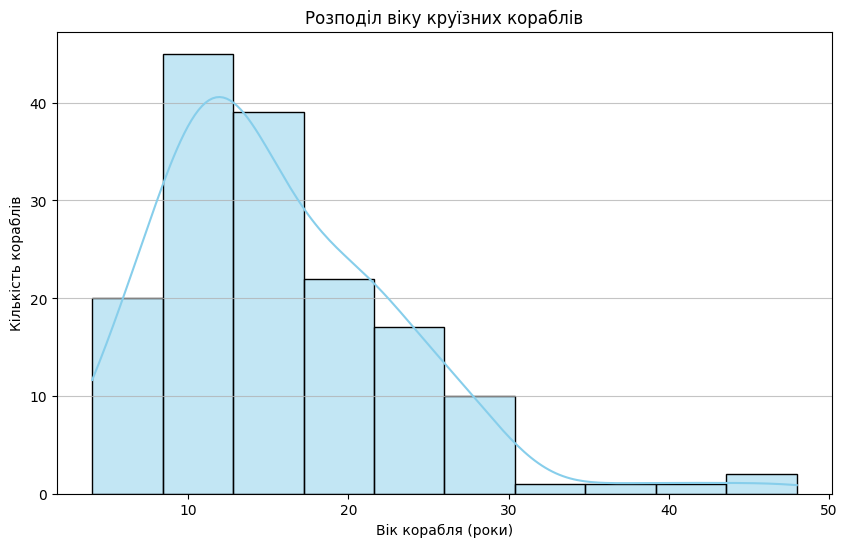

In [ ]:
age_data_pd = df_selected.select("ShipAge").toPandas()

plt.figure(figsize=(10, 6))
sns.histplot(age_data_pd['ShipAge'], bins=10, kde=True, color='skyblue')
plt.title('Розподіл віку круїзних кораблів')
plt.xlabel('Вік корабля (роки)')
plt.ylabel('Кількість кораблів')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Графік 2: Середня кількість екіпажу за круїзною лінією

<ipython-input-26-09d5bcca81f9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CruiseLine', y='AvgCrew', data=agg_data_for_plot_pd, palette='viridis')


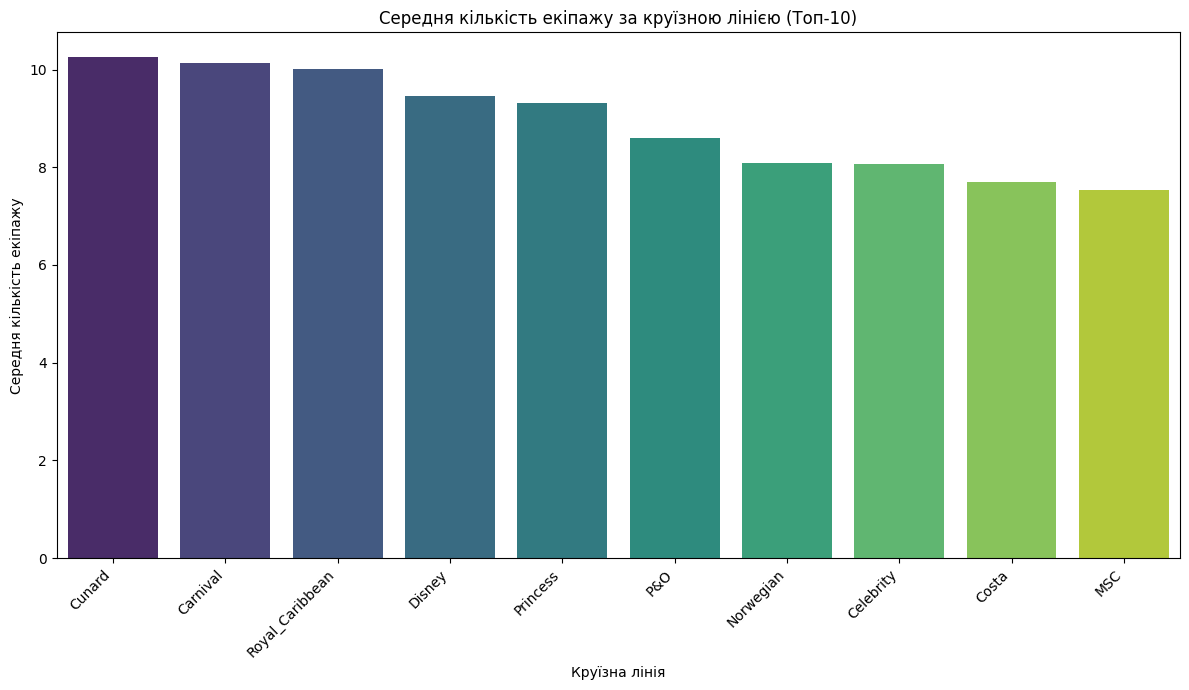

In [ ]:
agg_data_for_plot_pd = df_agg_by_line.orderBy(col("AvgCrew").desc()).limit(10).toPandas()

plt.figure(figsize=(12, 7))
sns.barplot(x='CruiseLine', y='AvgCrew', data=agg_data_for_plot_pd, palette='viridis')
plt.title('Середня кількість екіпажу за круїзною лінією (Топ-10)')
plt.xlabel('Круїзна лінія')
plt.ylabel('Середня кількість екіпажу')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Графік 3: Взаємозв'язок між тоннажем корабля та кількістю пасажирів (точковий графік)

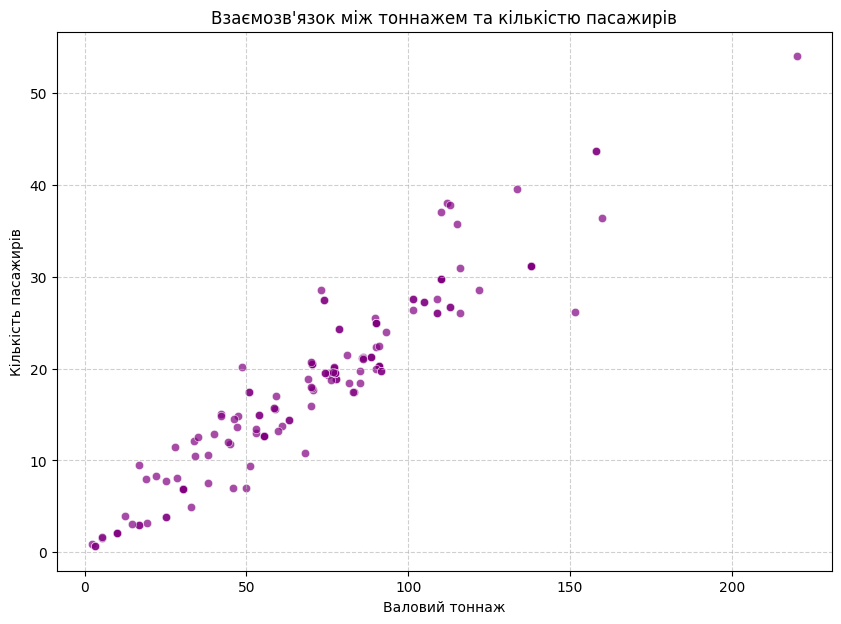

In [ ]:
scatter_data_pd = df_selected.select("GrossTonnage", "Passengers").toPandas()

plt.figure(figsize=(10, 7))
sns.scatterplot(x='GrossTonnage', y='Passengers', data=scatter_data_pd, alpha=0.7, color='purple')
plt.title('Взаємозв\'язок між тоннажем та кількістю пасажирів')
plt.xlabel('Валовий тоннаж')
plt.ylabel('Кількість пасажирів')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
spark.stop()
print("\nSparkSession stopped.")


SparkSession stopped.


#  Висновок :
Робота розпочалася з успішного налаштування PySpark та завантаження датасету Cruise. Виконано ключові операції PySpark, включаючи вибір, перейменування та фільтрацію стовпців. Додано новий стовпець "Crew_per_Passenger" для розширеного аналізу. Дані були ефективно агреговані, наприклад, розраховано середній тоннаж та екіпаж за круїзною лінією. Побудована гістограма показала розподіл віку кораблів. Стовпчикова діаграма порівняла середню кількість екіпажу між круїзними лініями. Точковий графік наочно продемонстрував прямий взаємозв'язок між тоннажем та кількістю пасажирів.